In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [3]:
matches.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN


In [4]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN


In [5]:
matches.drop("umpire3", axis=1, inplace=True)

In [6]:
matches.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen


In [7]:
deliveries.fillna(value=0, inplace=True)

In [8]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,0,0,0


2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2015    59
2008    58
2009    57
Name: season, dtype: int64


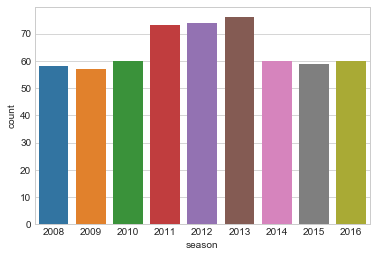

In [9]:
season_match = matches['season'].value_counts().sort_values(ascending=False)
print(season_match)
sns.countplot('season', data=matches)

                     team_name  winning_count
0               Mumbai Indians             80
1          Chennai Super Kings             79
2  Royal Challengers Bangalore             70
3        Kolkata Knight Riders             68
4              Kings XI Punjab             63
5             Rajasthan Royals             63
6             Delhi Daredevils             56
7          Sunrisers Hyderabad             34
8              Deccan Chargers             29
9                Pune Warriors             12


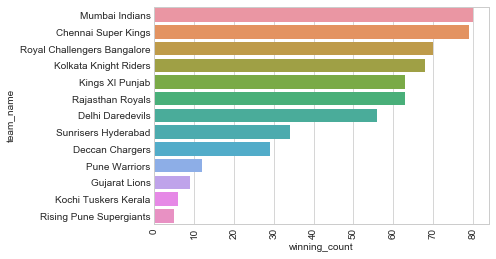

In [10]:
temp_res = matches['winner'].value_counts()
most_winning_team = pd.DataFrame({'team_name':temp_res.index, 'winning_count':temp_res.tolist()})
print(most_winning_team[:10])
plt.xticks(rotation=90)
sns.barplot('winning_count','team_name', data=most_winning_team)

Mumbai Indians                 74
Kolkata Knight Riders          69
Chennai Super Kings            66
Delhi Daredevils               64
Kings XI Punjab                64
Rajasthan Royals               63
Royal Challengers Bangalore    61
Deccan Chargers                43
Sunrisers Hyderabad            30
Pune Warriors                  20
Kochi Tuskers Kerala            8
Gujarat Lions                   8
Rising Pune Supergiants         7
Name: toss_winner, dtype: int64


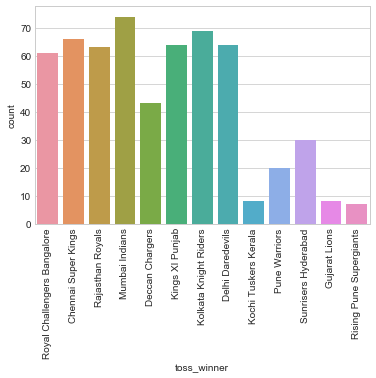

In [11]:
max_toss_winners = matches['toss_winner'].value_counts()
print(max_toss_winners)
plt.xticks(rotation=90)
sns.countplot('toss_winner', data=matches)

field    54.592721
bat      45.407279
Name: toss_decision, dtype: float64


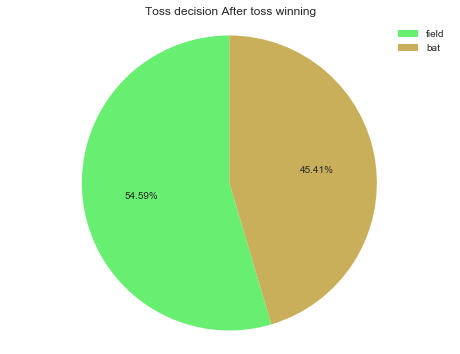

In [12]:
toss_decision_perentage = (matches['toss_decision'].value_counts() / 577) * 100
print(toss_decision_perentage)
plt.figure(figsize=(8,6))
color = ['#68EF72', '#CAAF5B', '#0AF8ED']
plt.pie(toss_decision_perentage.values, startangle=90, autopct='%1.2f%%', colors=color)
plt.legend(toss_decision_perentage.index)
plt.axis('equal')
plt.title("Toss decision After toss winning")

   count                                       venue
0     58                       M Chinnaswamy Stadium
1     54                                Eden Gardens
2     53                            Feroz Shah Kotla
3     49                            Wankhede Stadium
4     48             MA Chidambaram Stadium, Chepauk
5     41   Rajiv Gandhi International Stadium, Uppal
6     35  Punjab Cricket Association Stadium, Mohali
7     33                      Sawai Mansingh Stadium
8     17                  Dr DY Patil Sports Academy
9     17                  Subrata Roy Sahara Stadium


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

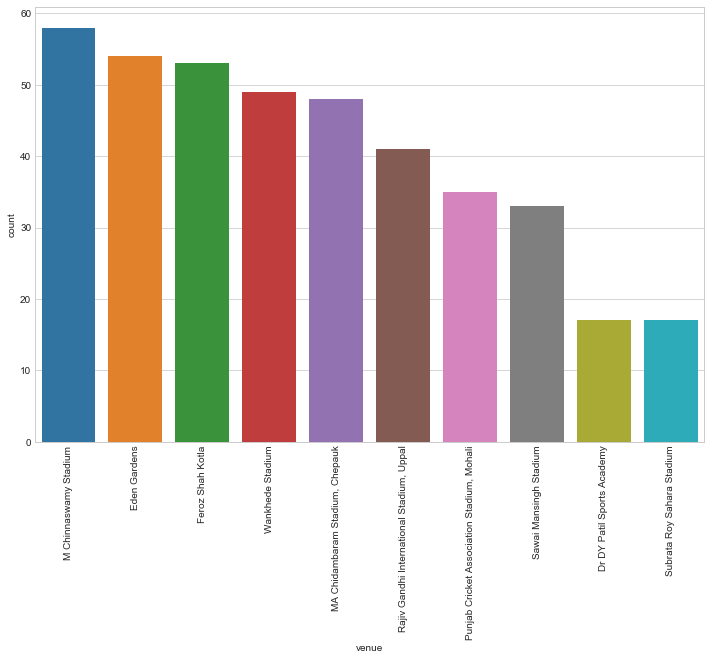

In [13]:
temp_res = matches['venue'].value_counts()
top_10_Venue = pd.DataFrame({'venue':temp_res.index, 'count':temp_res.tolist()})
print(top_10_Venue[:10])
plt.figure(figsize=(12,8))
sns.barplot('venue', 'count',data=top_10_Venue[:10])
plt.xticks(rotation=90)

                     team_name  win_by_runs
0  Royal Challengers Bangalore          144
1        Kolkata Knight Riders          140
2              Kings XI Punjab          111
3             Rajasthan Royals          105
4               Mumbai Indians           98
5          Chennai Super Kings           97
6          Sunrisers Hyderabad           85
7              Deccan Chargers           82
8             Delhi Daredevils           67
9                Pune Warriors           38


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

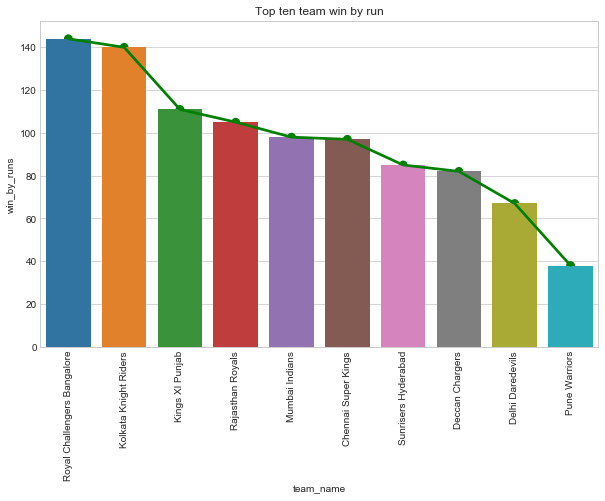

In [14]:
temp_res = matches.groupby('team1')['win_by_runs'].agg(max).sort_values(ascending=False)
win_by_run = pd.DataFrame({'team_name':temp_res.index, 'win_by_runs':temp_res.tolist()})
print(win_by_run[:10])
plt.figure(figsize=(10,6))
plt.title("Top ten team win by run")
sns.pointplot('team_name', 'win_by_runs',data=win_by_run[:10], color='g')
sns.barplot('team_name', 'win_by_runs',data=win_by_run[:10])
plt.xticks(rotation=90)

                     team_name  win_by_wickets
0          Sunrisers Hyderabad              10
1  Royal Challengers Bangalore              10
2             Rajasthan Royals              10
3               Mumbai Indians              10
4             Delhi Daredevils              10
5              Deccan Chargers              10
6          Chennai Super Kings              10
7      Rising Pune Supergiants               9
8        Kolkata Knight Riders               9
9              Kings XI Punjab               9


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

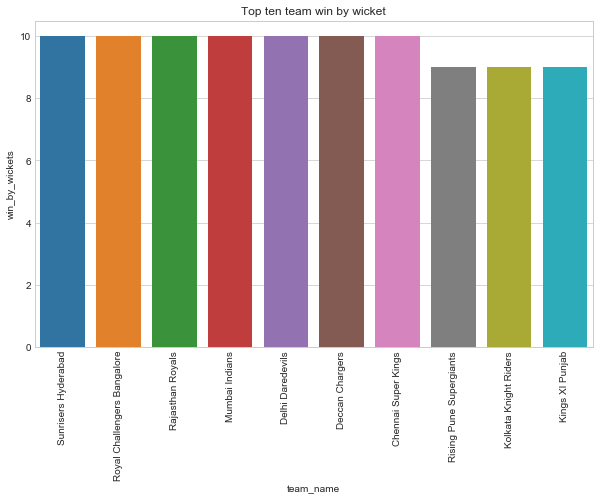

In [15]:
temp_res = matches.groupby('team2')['win_by_wickets'].agg(max).sort_values(ascending=False)
win_by_wkt = pd.DataFrame({'team_name':temp_res.index, 'win_by_wickets':temp_res.tolist()})
print(win_by_wkt[:10])
plt.figure(figsize=(10,6))
plt.title("Top ten team win by wicket")
sns.barplot('team_name', 'win_by_wickets',data=win_by_wkt[:10])
plt.xticks(rotation=90)

   count     player_name
0     17        CH Gayle
1     16       YK Pathan
2     15  AB de Villiers
3     14       DA Warner
4     13       RG Sharma
5     13        SK Raina
6     12        MS Dhoni
7     12       G Gambhir
8     12      MEK Hussey
9     12       AM Rahane


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

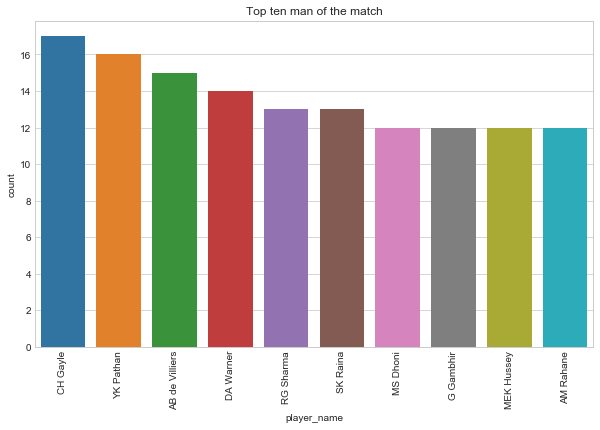

In [16]:
player_of_match_name = matches['player_of_match'].value_counts().index
player_of_match_count = matches['player_of_match'].value_counts().tolist()
top_10_player_of_match = pd.DataFrame({'player_name':player_of_match_name, 'count':player_of_match_count})
top_10_player_of_match[:10]
print(top_10_player_of_match[:10])
plt.figure(figsize=(10,6))
plt.title("Top ten man of the match")
sns.barplot('player_name', 'count',data=top_10_player_of_match[:10])
plt.xticks(rotation=90)

                          team  toss_win_count
0               Mumbai Indians              74
1        Kolkata Knight Riders              69
2          Chennai Super Kings              66
3             Delhi Daredevils              64
4              Kings XI Punjab              64
5             Rajasthan Royals              63
6  Royal Challengers Bangalore              61
7              Deccan Chargers              43
8          Sunrisers Hyderabad              30
9                Pune Warriors              20


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

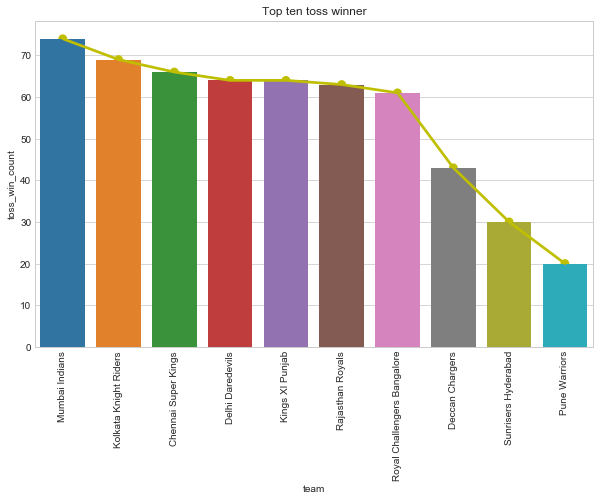

In [17]:
toss_winner_index = matches['toss_winner'].value_counts().index
toss_win_count = matches['toss_winner'].value_counts().tolist()
top_10_toss_winner = pd.DataFrame({'team':toss_winner_index, 'toss_win_count':toss_win_count})
print(top_10_toss_winner[:10])
plt.figure(figsize=(10,6))
plt.title("Top ten toss winner")
sns.pointplot('team', 'toss_win_count',data=top_10_toss_winner[:10], color='y')
sns.barplot('team', 'toss_win_count',data=top_10_toss_winner[:10])
plt.xticks(rotation=90)

           batsman  batsman_runs
0          V Kohli          4115
1         SK Raina          4106
2        RG Sharma          3874
3        G Gambhir          3634
4         CH Gayle          3451
5       RV Uthappa          3390
6        DA Warner          3373
7         MS Dhoni          3270
8   AB de Villiers          3270
9         S Dhawan          3082
10       YK Pathan          2779


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

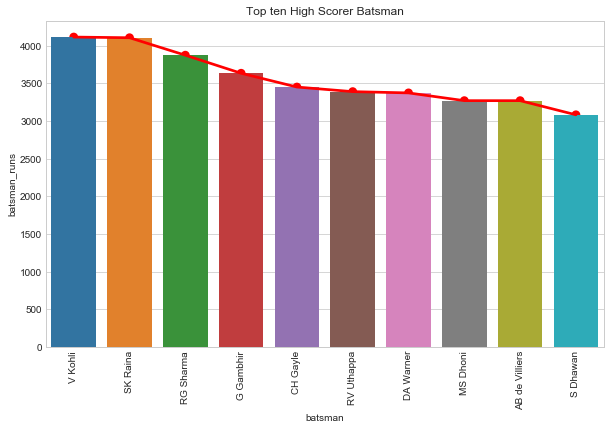

In [18]:
Batsman_runs = deliveries.groupby('batsman')["batsman_runs"].agg(sum).reset_index().sort_values(by="batsman_runs",ascending=False)
Top_10_batsman = Batsman_runs[:11]
print(Top_10_batsman.reset_index(drop=True))
plt.figure(figsize=(10,6))
plt.title("Top ten High Scorer Batsman")
sns.pointplot('batsman', 'batsman_runs',data=Top_10_batsman[:10], color='r')
sns.barplot('batsman', 'batsman_runs',data=Top_10_batsman[:10])
plt.xticks(rotation=90)

            bowler  total_runs
0          P Kumar        3188
1  Harbhajan Singh        3184
2        PP Chawla        3136
3         A Mishra        2960
4    R Vinay Kumar        2945
5         DJ Bravo        2815
6        IK Pathan        2685
7       SL Malinga        2646
8         R Ashwin        2552
9           Z Khan        2537


(array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.]),
 <a list of 8 Text xticklabel objects>)

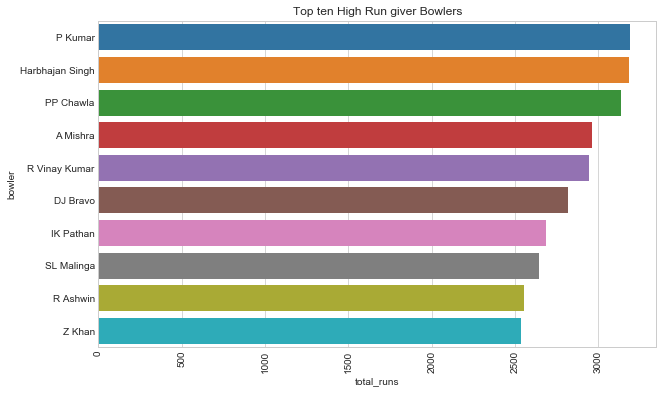

In [19]:
Bowler_run = deliveries.groupby('bowler')["total_runs"].agg(sum).reset_index().sort_values(by="total_runs",ascending=False)
Top_10_expen_bowler = Bowler_run[:10]
print(Top_10_expen_bowler.reset_index(drop=True))
plt.figure(figsize=(10,6))
plt.title("Top ten High Run giver Bowlers")
sns.barplot('total_runs', 'bowler',data=Top_10_expen_bowler[:10])
plt.xticks(rotation=90)

          dismissal_kind  total_num
0                 caught       3954
1                 bowled       1251
2                run out        697
3                    lbw        399
4                stumped        222
5      caught and bowled        187
6           retired hurt          8
7             hit wicket          8
8  obstructing the field          1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

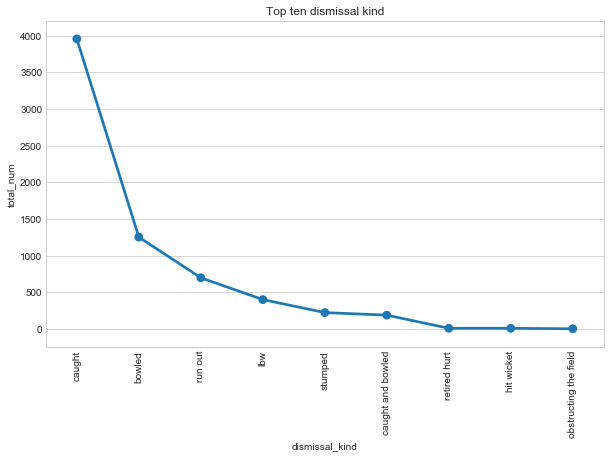

In [35]:
index = deliveries['dismissal_kind'].value_counts().index.tolist()
count = deliveries['dismissal_kind'].value_counts().tolist()
df = pd.DataFrame({'dismissal_kind': index[1:], 'total_num':count[1:]})
print(df)
plt.figure(figsize=(10,6))
plt.title("Top ten dismissal kind")
sns.pointplot('dismissal_kind', 'total_num',data=df)
plt.xticks(rotation=90)

            bowler  extra_runs
0       SL Malinga         239
1          P Kumar         222
2         RP Singh         181
3         DW Steyn         166
4         DJ Bravo         157
5        SR Watson         157
6           Z Khan         154
7  Harbhajan Singh         154
8        JA Morkel         153
9         I Sharma         149


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

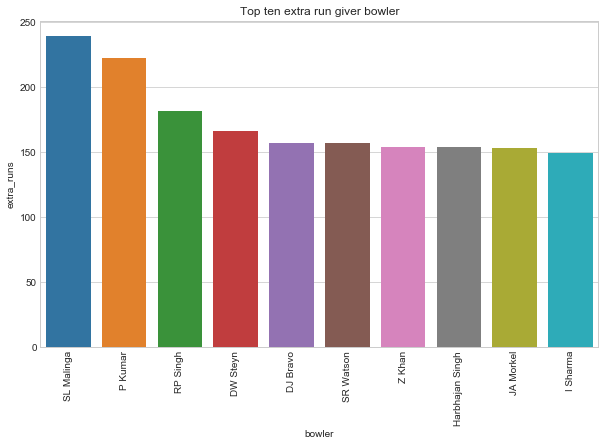

In [21]:
total_extra = deliveries.groupby('bowler')['extra_runs'].agg(sum).reset_index().sort_values(by='extra_runs', ascending=False)
top_10_extra_run_bowler = total_extra.reset_index(drop=True)[:10]
top_10_extra_run_bowler
print(top_10_extra_run_bowler)
plt.figure(figsize=(10,6))
plt.title("Top ten extra run giver bowler")
sns.barplot('bowler', 'extra_runs',data=top_10_extra_run_bowler)
plt.xticks(rotation=90)

V Kohli           3237
SK Raina          3059
G Gambhir         3028
RG Sharma         2996
RV Uthappa        2721
S Dhawan          2622
DA Warner         2440
MS Dhoni          2419
CH Gayle          2360
AB de Villiers    2231
YK Pathan         1953
Name: batsman, dtype: int64


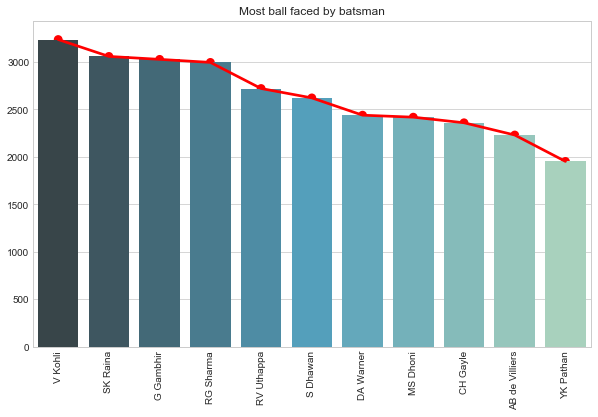

In [22]:
Top_10_batsman_faced_ball = deliveries['batsman'][deliveries['batsman'].isin(Top_10_batsman['batsman'].tolist())].value_counts()
print(Top_10_batsman_faced_ball)
plt.figure(figsize=(10,6))
plt.title("Most ball faced by batsman")
plt.xticks(rotation=90)
sns.barplot(Top_10_batsman_faced_ball.index, Top_10_batsman_faced_ball.values, palette='GnBu_d')
sns.pointplot(Top_10_batsman_faced_ball.index, Top_10_batsman_faced_ball.values, color="r")

          batsman  ball  batsman_runs  strike_rate
0         V Kohli  3237          4115   127.123880
1        SK Raina  3059          4106   134.226872
2       RG Sharma  2996          3874   129.305741
3       G Gambhir  3028          3634   120.013210
4        CH Gayle  2360          3451   146.228814
5      RV Uthappa  2721          3390   124.586549
6       DA Warner  2440          3373   138.237705
7        MS Dhoni  2419          3270   135.179826
8  AB de Villiers  2231          3270   146.571044
9        S Dhawan  2622          3082   117.543860


(-1.1032822054779678,
 1.1320082375705429,
 -1.1981614635037159,
 1.1046743783256561)

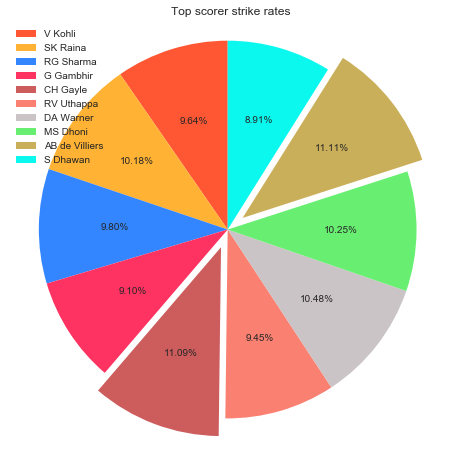

In [23]:
balls=deliveries.groupby(['batsman'])['ball'].count().reset_index()
runs=deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
strike_rate = (balls['batsman_runs']/balls['ball']) * 100
balls['strike_rate'] = strike_rate;
balls = balls.sort_values('batsman_runs', ascending=False).reset_index(drop=True)
print(balls[:10])
plt.figure(figsize=(8,8))
explode = (0, 0, 0, 0,0.1,0,0,0,0.1,0)
color = ['#FF5733','#FFB233', '#3386FF', '#FF3361', '#CD5C5C', '#FA8072', '#CBC4C6', '#68EF72', '#CAAF5B', '#0AF8ED']
plt.pie(balls['strike_rate'][:10].tolist(), startangle=90, autopct='%3.2f%%', explode=explode, colors=color)
plt.legend(balls['batsman'][:10], loc=2)
plt.title("Top scorer strike rates")
# View the plot drop above
plt.axis('equal')

In [24]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000
mean,288.564679,1.482738,10.144585,3.617125,0.000498,0.037782,0.004978,0.022372,0.004480,0.000073,1.215311,0.069686,1.284997
std,165.929865,0.501575,5.673901,1.808200,0.022306,0.260535,0.115512,0.201309,0.074062,0.019132,1.589654,0.353357,1.579014
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,289.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,432.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,577.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [25]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,577.000000,577.000000,577.000000,577.000000,577.000000
mean,289.000000,2012.029463,0.025997,13.715771,3.363951
std,166.709828,2.486247,0.159263,23.619282,3.416049
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,145.000000,2010.000000,0.000000,0.000000,0.000000
50%,289.000000,2012.000000,0.000000,0.000000,3.000000
75%,433.000000,2014.000000,0.000000,20.000000,6.000000
max,577.000000,2016.000000,1.000000,144.000000,10.000000


In [26]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136598 entries, 0 to 136597
Data columns (total 21 columns):
match_id            136598 non-null int64
inning              136598 non-null int64
batting_team        136598 non-null object
bowling_team        136598 non-null object
over                136598 non-null int64
ball                136598 non-null int64
batsman             136598 non-null object
non_striker         136598 non-null object
bowler              136598 non-null object
is_super_over       136598 non-null int64
wide_runs           136598 non-null int64
bye_runs            136598 non-null int64
legbye_runs         136598 non-null int64
noball_runs         136598 non-null int64
penalty_runs        136598 non-null int64
batsman_runs        136598 non-null int64
extra_runs          136598 non-null int64
total_runs          136598 non-null int64
player_dismissed    136598 non-null object
dismissal_kind      136598 non-null object
fielder             136598 non-null object

                      team_name  total_matches
0                Mumbai Indians            140
1   Royal Challengers Bangalore            139
2               Kings XI Punjab            134
3              Delhi Daredevils            133
4         Kolkata Knight Riders            132
5           Chennai Super Kings            131
6              Rajasthan Royals            118
7               Deccan Chargers             75
8           Sunrisers Hyderabad             62
9                 Pune Warriors             46
10                Gujarat Lions             16
11      Rising Pune Supergiants             14
12         Kochi Tuskers Kerala             14


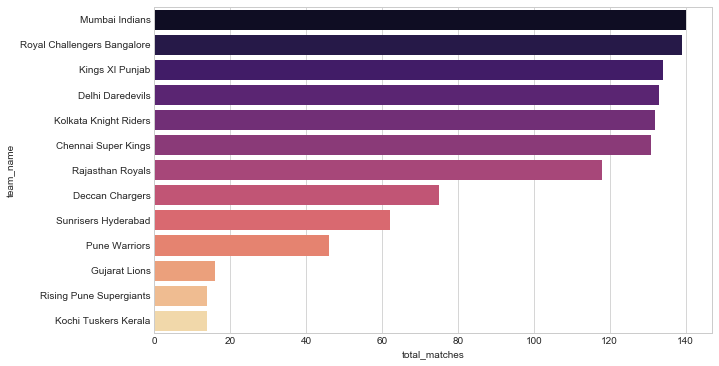

In [27]:
temp_res = pd.concat([matches['team1'],matches['team2']]).value_counts()
total_matches_played_by_team = pd.DataFrame({'team_name':temp_res.index, 'total_matches':temp_res.tolist()})
print(total_matches_played_by_team)
plt.figure(figsize=(10,6))
sns.barplot('total_matches','team_name', data=total_matches_played_by_team, palette= 'magma')

In [28]:
temp_res = total_matches_played_by_team.merge(most_winning_team, left_on="team_name", right_on="team_name", how='outer')
temp_res['winnig_percentage'] = np.array(temp_res['winning_count'].tolist()) / np.array(temp_res['total_matches'].tolist()) * 100
temp_res

,team_name,total_matches,winning_count,winnig_percentage
0,Mumbai Indians,140,80,57.142857
1,Royal Challengers Bangalore,139,70,50.359712
2,Kings XI Punjab,134,63,47.014925
3,Delhi Daredevils,133,56,42.105263
4,Kolkata Knight Riders,132,68,51.515152
5,Chennai Super Kings,131,79,60.305344
6,Rajasthan Royals,118,63,53.389831
7,Deccan Chargers,75,29,38.666667
8,Sunrisers Hyderabad,62,34,54.838710
9,Pune Warriors,46,12,26.086957


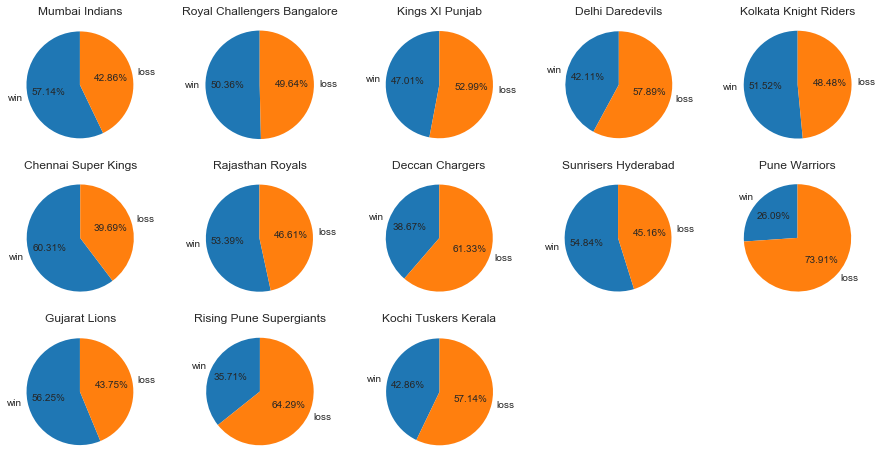

In [29]:
fig, axes = plt.subplots(3, 5, figsize=(15, 8))
win_lose = [];
def wining_per_pie(i, team_name):
    ax = axes[i//5, i%5]
    win_lose.clear()
    win_age = temp_res[temp_res.team_name == team_name]['winnig_percentage'].tolist()[0]
    win_lose.append(win_age)
    win_lose.append(100-win_age)
#     print(win_lose)
    ax.pie(x =win_lose, startangle=90, autopct='%2.2f%%', labels=['win', 'loss'])
#     ax.legend(['win', 'loss'], loc =7, bbox_to_anchor = (0.1,.5))
    ax.set_title(team_name)
    ax.axis('equal')
#
for i, name in enumerate(temp_res['team_name']):
    wining_per_pie(i,name)
fig.subplots_adjust(wspace=.5)
fig.delaxes(axes[2][3])
fig.delaxes(axes[2][4])

In [30]:
pivot = pd.pivot_table(deliveries, index='batsman', values=['ball', 'batsman_runs'], aggfunc={'ball':'count', 'batsman_runs':np.sum})
pivot.sort_values(by='batsman_runs', ascending=False)[:10]

,ball,batsman_runs
batsman,,
V Kohli,3237,4115
SK Raina,3059,4106
RG Sharma,2996,3874
G Gambhir,3028,3634
CH Gayle,2360,3451
RV Uthappa,2721,3390
DA Warner,2440,3373
MS Dhoni,2419,3270
AB de Villiers,2231,3270


In [31]:
pd.pivot_table(deliveries, index=['batsman', 'batting_team'], values=['batsman_runs'], aggfunc='sum').sort_values(by='batsman_runs', ascending=False)[:10]

,,batsman_runs
batsman,batting_team,
V Kohli,Royal Challengers Bangalore,4115
SK Raina,Chennai Super Kings,3707
MS Dhoni,Chennai Super Kings,2986
CH Gayle,Royal Challengers Bangalore,2975
RG Sharma,Mumbai Indians,2704
AB de Villiers,Royal Challengers Bangalore,2599
G Gambhir,Kolkata Knight Riders,2537
SR Watson,Rajasthan Royals,2378
SR Tendulkar,Mumbai Indians,2334


In [32]:
table = pd.pivot_table(deliveries, margins=True, index=['bowling_team'], columns=['batsman'], values=['batsman_runs'], aggfunc='sum', fill_value=0)
table

batsman_runs                                 \
batsman                     A Ashish Reddy A Chandila A Chopra A Flintoff   
bowling_team                                                                
Chennai Super Kings                   45.0        0.0      0.0        0.0   
Deccan Chargers                        0.0        0.0     35.0        0.0   
Delhi Daredevils                      36.0        0.0     13.0       16.0   
Gujarat Lions                          0.0        0.0      0.0        0.0   
Kings XI Punjab                       37.0        0.0      2.0        0.0   
Kochi Tuskers Kerala                   0.0        0.0      0.0        0.0   
Kolkata Knight Riders                 17.0        0.0      0.0        0.0   
Mumbai Indians                        27.0        0.0      1.0       24.0   
Pune Warriors                         26.0        0.0      0.0        0.0   
Rajasthan Royals                      37.0        0.0      0.0        0.0   
Rising Pune Supergiants                0.0        0.0      0.0        0.0   
Royal Challengers Bangalore           55.0        4.0      2.0       22.0   
Sunrisers Hyderabad                    0.0        0.0      0.0        0.0   
All                                  280.0        4.0     53.0       62.0   

                                                                         \
batsman                     A Kumble A Mishra A Mithun A Mukund A Nehra   
bowling_team                                                              
Chennai Super Kings              3.0     44.0     11.0      0.0     1.0   
Deccan Chargers                  4.0      6.0      0.0      0.0    22.0   
Delhi Daredevils                 2.0     22.0      5.0      0.0     1.0   
Gujarat Lions                    0.0      0.0      0.0      0.0     0.0   
Kings XI Punjab                  9.0     22.0     16.0      0.0     6.0   
Kochi Tuskers Kerala             0.0      0.0      0.0      0.0     0.0   
Kolkata Knight Riders            0.0     62.0      2.0      0.0     1.0   
Mumbai Indians                   9.0     73.0      0.0      0.0     1.0   
Pune Warriors                    0.0     30.0      0.0      0.0     0.0   
Rajasthan Royals                 8.0     30.0      0.0     19.0     9.0   
Rising Pune Supergiants          0.0      0.0      0.0      0.0     0.0   
Royal Challengers Bangalore      0.0      2.0      0.0      0.0     0.0   
Sunrisers Hyderabad              0.0      0.0      0.0      0.0     0.0   
All                             35.0    291.0     34.0     19.0    41.0   

                                       ...                                \
batsman                     A Singh    ...    Y Venugopal Rao YA Abdulla   
bowling_team                           ...                                 
Chennai Super Kings             1.0    ...              132.0        0.0   
Deccan Chargers                 0.0    ...               24.0        0.0   
Delhi Daredevils                0.0    ...               66.0        0.0   
Gujarat Lions                   0.0    ...                0.0        0.0   
Kings XI Punjab                 0.0    ...              118.0        0.0   
Kochi Tuskers Kerala            0.0    ...               41.0        0.0   
Kolkata Knight Riders           1.0    ...              151.0        0.0   
Mumbai Indians                  0.0    ...              164.0        0.0   
Pune Warriors                   0.0    ...               31.0        0.0   
Rajasthan Royals                0.0    ...              113.0        0.0   
Rising Pune Supergiants         0.0    ...                0.0        0.0   
Royal Challengers Bangalore     0.0    ...              145.0        0.0   
Sunrisers Hyderabad             0.0    ...                0.0        0.0   
All                             2.0    ...              985.0        0.0   

                                                                           \
batsman                     YK Pathan YS Chahal YV Takawale Yashpal Singh 

In [33]:
list(table.columns)[:10]

[('batsman_runs', 'A Ashish Reddy'),
 ('batsman_runs', 'A Chandila'),
 ('batsman_runs', 'A Chopra'),
 ('batsman_runs', 'A Flintoff'),
 ('batsman_runs', 'A Kumble'),
 ('batsman_runs', 'A Mishra'),
 ('batsman_runs', 'A Mithun'),
 ('batsman_runs', 'A Mukund'),
 ('batsman_runs', 'A Nehra'),
 ('batsman_runs', 'A Singh')]

In [34]:
ptable = table[[('batsman_runs', 'V Kohli'),
 ('batsman_runs', 'SK Raina'),
 ('batsman_runs','MS Dhoni'),
 ('batsman_runs', 'RG Sharma'),
 ('batsman_runs', 'AB de Villiers'),
 ('batsman_runs', 'G Gambhir'),
 ('batsman_runs', 'SR Watson'),
 ('batsman_runs', 'SR Tendulkar'),
 ('batsman_runs', 'AT Rayudu')]]
ptable
# print(ptable)
# ptable.plot(kind='hist', mark_right=False)

batsman_runs                              \
batsman                          V Kohli SK Raina MS Dhoni RG Sharma   
bowling_team                                                           
Chennai Super Kings                706.0      0.0      0.0     535.0   
Deccan Chargers                    306.0    310.0    281.0     175.0   
Delhi Daredevils                   603.0    408.0    403.0     655.0   
Gujarat Lions                      209.0      0.0     52.0      37.0   
Kings XI Punjab                    477.0    620.0    448.0     523.0   
Kochi Tuskers Kerala                50.0     69.0     23.0       0.0   
Kolkata Knight Riders              386.0    549.0    359.0     655.0   
Mumbai Indians                     365.0    679.0    512.0     103.0   
Pune Warriors                      128.0    127.0    135.0     135.0   
Rajasthan Royals                   258.0    471.0    249.0     403.0   
Rising Pune Supergiants            188.0     58.0      0.0      92.0   
Royal Challengers Bangalore          0.0    549.0    559.0     463.0   
Sunrisers Hyderabad                439.0    266.0    249.0      98.0   
All                               4115.0   4106.0   3270.0    3874.0   

                                                                             \
batsman                     AB de Villiers G Gambhir SR Watson SR Tendulkar   
bowling_team                                                                  
Chennai Super Kings                  374.0     429.0     480.0        368.0   
Deccan Chargers                      153.0     225.0      80.0        230.0   
Delhi Daredevils                     247.0     328.0     267.0        294.0   
Gujarat Lions                        228.0      13.0       7.0          0.0   
Kings XI Punjab                      383.0     591.0     318.0        270.0   
Kochi Tuskers Kerala                  54.0       3.0      69.0        100.0   
Kolkata Knight Riders                237.0     147.0     344.0        326.0   
Mumbai Indians                       448.0     400.0     328.0          0.0   
Pune Warriors                        149.0     182.0     165.0        152.0   
Rajasthan Royals                     485.0     423.0       0.0        273.0   
Rising Pune Supergiants               84.0      11.0      37.0          0.0   
Royal Challengers Bangalore          115.0     616.0     271.0        269.0   
Sunrisers Hyderabad                  313.0     266.0     191.0         52.0   
All                                 3270.0    3634.0    2557.0       2334.0   

                                       
batsman                     AT Rayudu  
bowling_team                           
Chennai Super Kings             320.0  
Deccan Chargers                 108.0  
Delhi Daredevils                356.0  
Gujarat Lions                    20.0  
Kings XI Punjab                 276.0  
Kochi Tuskers Kerala             53.0  
Kolkata Knight Riders           195.0  
Mumbai Indians                    0.0  
Pune Warriors                    92.0  
Rajasthan Royals                249.0  
Rising Pune Supergiants          44.0  
Royal Challengers Bangalore     406.0  
Sunrisers Hyderabad             206.0  
All                            2325.0